# Describe Data
This notebook explores the dataset in its raw form without any scaling or normalization


### Load the data
Data is loaded from csv, grouped by class and a bar plot of the relative class counts displayed

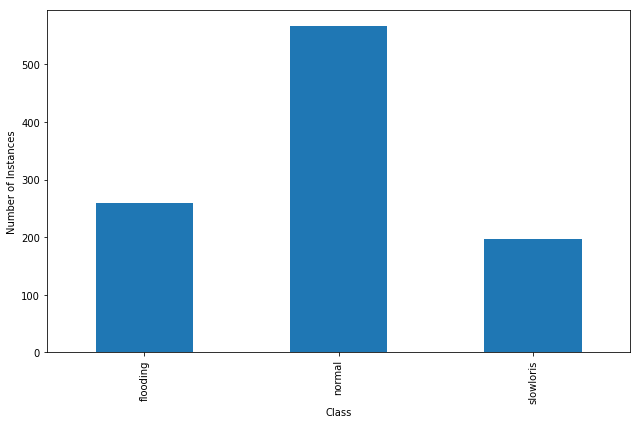

In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data_path = '../data/external/expanded_dataset_v1.csv'
data = pd.read_csv(data_path)

X = data.drop(['Class'], axis=1)
Y = data['Class']
# data.groupby('Class').hist(figsize=(9,9))

ax = data.groupby('Class').Class.count().plot(kind='bar', figsize=(9,6))
ax.set_xlabel('Class')
ax.set_ylabel('Number of Instances')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig('../reports/figures/objective-1/class_distribution.png')

In [49]:
data.groupby('Class').Class.count()


Class
flooding     259
normal       566
slowloris    197
Name: Class, dtype: int64

In [48]:
data.Class.count()

1022

#### Box plots of feature distributions

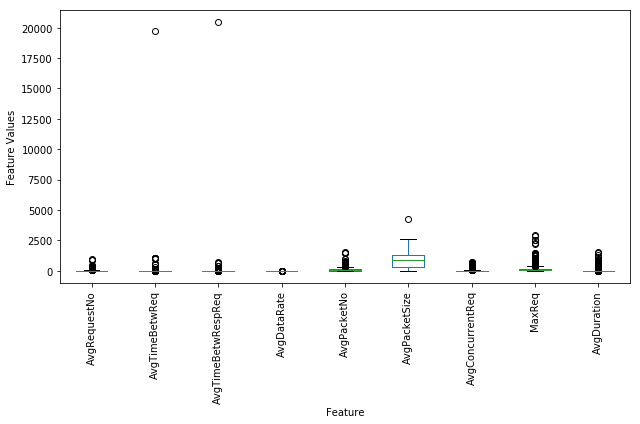

In [44]:
ax = data.plot(kind='box', figsize=(9,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Values')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig('../reports/figures/objective-1/feature_distributions.png')

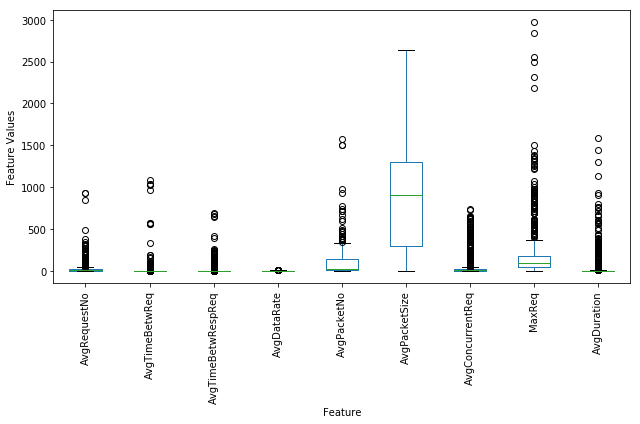

In [51]:
ax = data[data < 3000].plot(kind='box', figsize=(9,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Values')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig('../reports/figures/objective-1/feature_distributions2.png')

###  Feature Importance
Use a tree generator with Gini index to see which features have most predictive importance

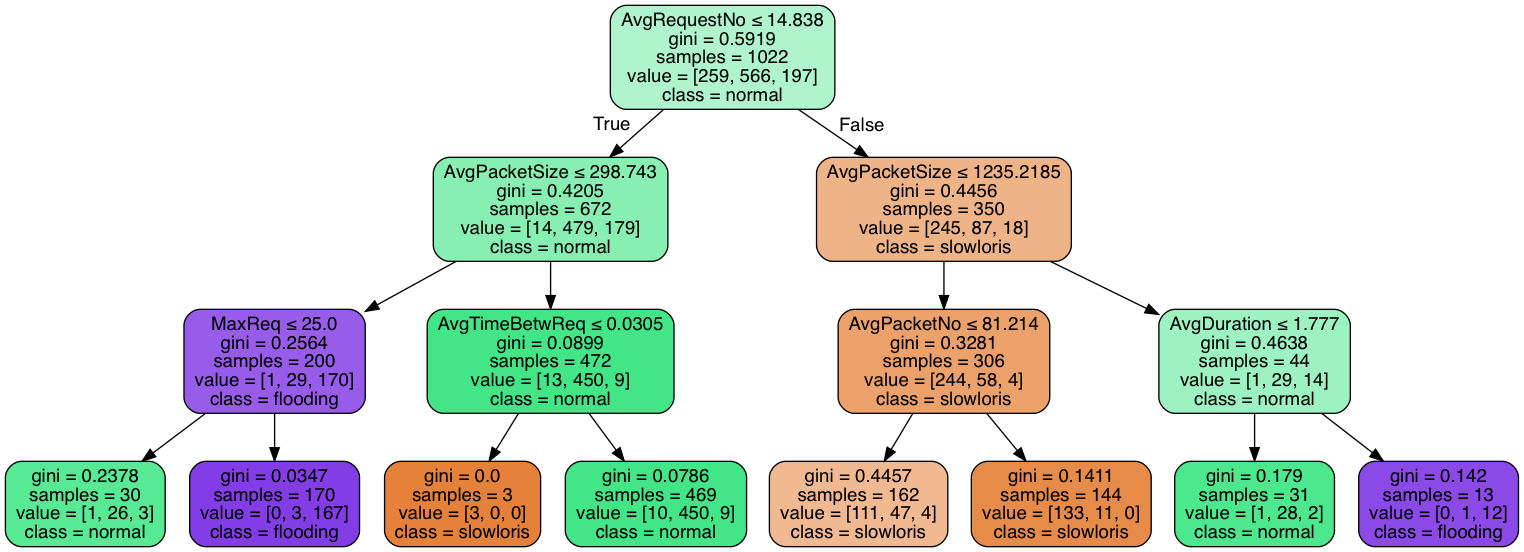

In [35]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict
import pydotplus
from IPython.display import Image

tree_classifier = tree.DecisionTreeClassifier(max_depth=3)
tree_classifier.fit(X, Y)
dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                         feature_names=list(X),  
                         class_names=Y.unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Feature Redundance

Print correlation matrix of every feature

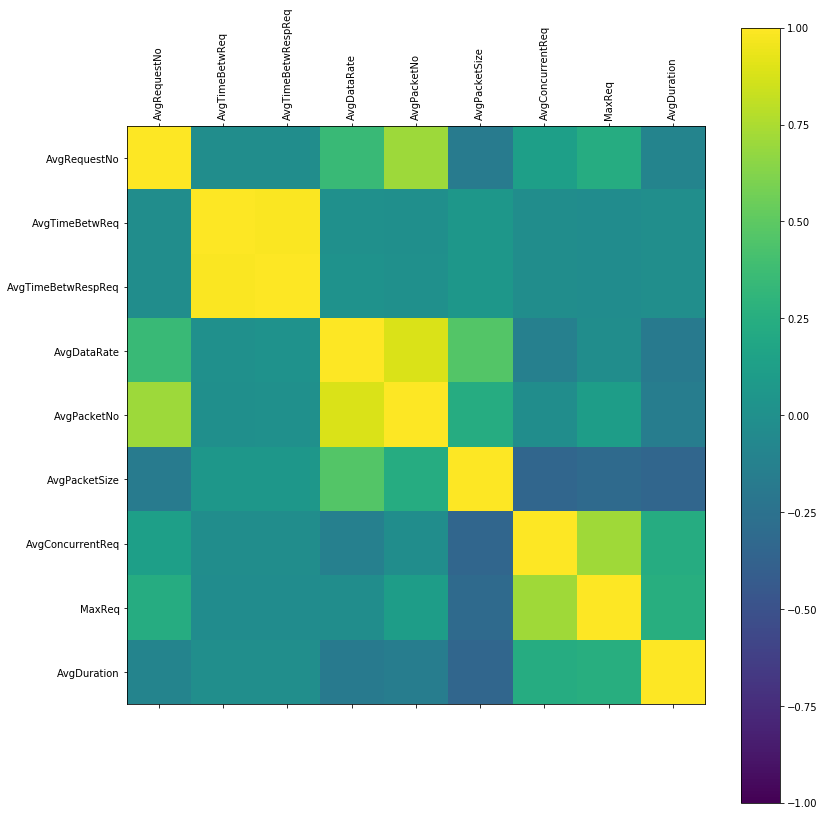

In [53]:
import matplotlib.pyplot as plt
import numpy
correlations = data.corr()
# plot correlation matrix
names = list(X)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
fig = ax.get_figure()
fig.savefig('../reports/figures/objective-1/feature_corr.png')

In [29]:
import glob
results_dir = '/Users/rag/Desktop/results/experiment-3'
all_csv_files = glob.glob(results_dir + "/*.csv")
train_val_metrics = [
        "train_accuracy",
        "train_f1",
        "train_precision",
        "train_recall",
        "val_accuracy",
        "val_f1",
        "val_precision",
        "val_recall",
    ]

test_dummy_metrics = [
    "test_accuracy",
    "test_f1",
    "test_precision",
    "test_recall",
    "dummy_accuracy",
    "dummy_f1",
    "dummy_precision",
    "dummy_recall"
]
print(all_csv_files)

['/Users/rag/Desktop/results/experiment-3/experiment-3_all.csv', '/Users/rag/Desktop/results/experiment-3/experiment-3_flooding_slowloris.csv', '/Users/rag/Desktop/results/experiment-3/experiment-3_normal_flood.csv', '/Users/rag/Desktop/results/experiment-3/experiment-3_normal_slowloris.csv']


experiment-3_all_learning_curve.png


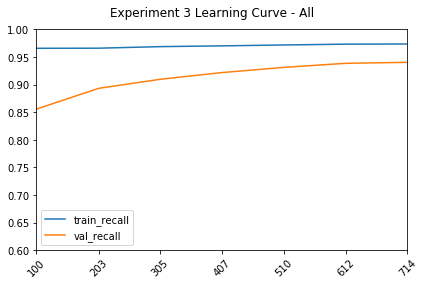

experiment-3_flooding_slowloris_learning_curve.png


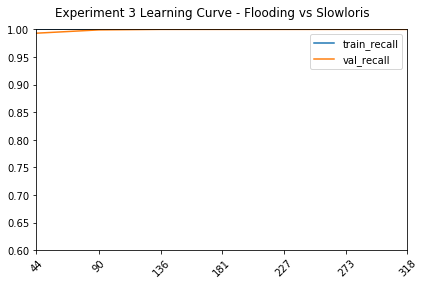

experiment-3_normal_flood_learning_curve.png


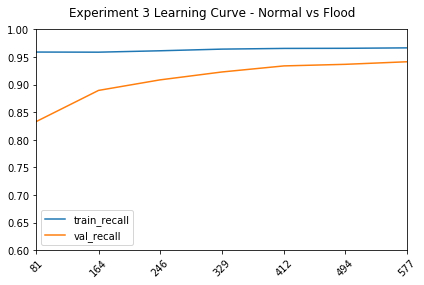

experiment-3_normal_slowloris_learning_curve.png


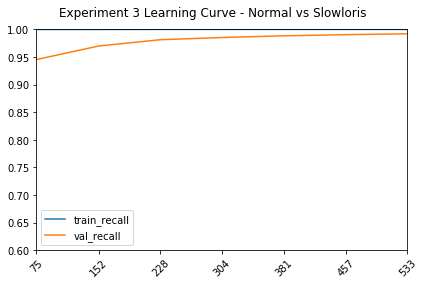

In [59]:
import os
import matplotlib.pyplot as plt
for file in all_csv_files:

    file_name = os.path.basename(file)
    file_name = os.path.splitext(file_name)[0]
    title, data_set_name = file_name.split('_', 1)
    prefix = title
    title = title.replace('-', ' ').title()
    data_set_tile = data_set_name.replace('_', ' ').title()
    data_set_tile = data_set_tile.replace(' ', ' vs ')
    os.makedirs(os.path.join(results_dir, 'figs', data_set_name), exist_ok=True)



    os.makedirs(os.path.join(results_dir, 'figs', data_set_name), exist_ok=True)
    fig_file_name = '{}_{}_{}.png'.format(prefix, data_set_name, 'learning_curve')

    print(fig_file_name)
    df = pd.read_csv(file, index_col=None, header=0)

    p = df.groupby('train_size').mean()

    # print(p
    ax = p.plot(kind='line', x=p.index.values, y=['train_recall', 'val_recall'])
    plt.xticks(p.index, p.index.values, rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0.6,1)
    plt.suptitle('{} Learning Curve - {}'.format(title, data_set_tile))

    fig = ax.get_figure()
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    fig.savefig(os.path.join(results_dir, 'figs', data_set_name, fig_file_name))
    plt.close()
